### 🚗 Used Car Price Prediction & Model Refinement

##### 📌 Project Overview
This project predicts the selling price of a used car based on its features using regression models.  
We refine our model using **cross-validation**, **polynomial features**, **Ridge regression**, and **Grid Search**.


##### Load & Inspect Dataset

In [2]:
# Load & Inspect Dataset

import pandas as pd

df = pd.read_csv("usedcars.csv")
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# Basic dataset info
df.shape

(201, 29)

In [4]:
# Check column info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [6]:
# Check missing values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [7]:
# Summary statistics
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


##### Data Cleaning & Preparation

In [8]:
# Drop irrelevant column 'car_id'
if 'car_id' in df.columns:
    df.drop('car_id', axis=1, inplace=True)

# Drop rows with missing target
df.dropna(subset=['price'], inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate target and features
y_data = df['price']
x_data = df.drop('price', axis=1)


In [9]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_Low,horsepower-binned_Medium
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,True,False,False,False,True
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,True,False,False,False,True
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,True,False,False,False,True
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,True,False,False,False,True
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,True,False,False,False,True


##### Train/Test Split
We split the dataset into **training** (90%) and **testing** (10%) sets.


In [13]:
from sklearn.model_selection import train_test_split

# Fill numeric NaNs with the column mean
x_data = x_data.fillna(x_data.mean())

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)


##### Baseline Linear Regression
We start with a simple Linear Regression model to set a baseline performance.


In [ ]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()
lre.fit(x_train, y_train)

print("Train R²:", lre.score(x_train, y_train))
print("Test R²:", lre.score(x_test, y_test))

Train R²: 0.9736403290699703
Test R²: 0.9182016640610567


##### Cross-Validation
We use 4-fold cross-validation to ensure performance is consistent.


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lre, x_data, y_data, cv=4)
print("Mean R²:", scores.mean())
print("Std deviation:", scores.std())

Mean R²: 0.17394801511377683
Std deviation: 0.5746297033719373


##### Polynomial Features + Ridge Regression
Polynomial features allow the model to capture non-linear patterns,while Ridge regression helps prevent overfitting.


In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Pipeline with scaling, polynomial expansion, and ridge regression
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1))
])

model.fit(x_train, y_train)
print("Train R²:", model.score(x_train, y_train))
print("Test R²:", model.score(x_test, y_test))


Train R²: 0.9976360223146382
Test R²: 0.47898759019703574


##### Grid Search for Best Hyperparameters
We use Grid Search to find the best `alpha` for Ridge regression.


In [18]:
from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}]
RR = Ridge()
Grid = GridSearchCV(RR, parameters, cv=4)
Grid.fit(x_data, y_data)

print("Best alpha:", Grid.best_estimator_.alpha)
print("Best CV score:", Grid.best_score_)


Best alpha: 100
Best CV score: 0.6283786017055186


##### Model Evaluation
We evaluate the best model using R² and Mean Squared Error (MSE).


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = Grid.best_estimator_.predict(x_test)
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² score: 0.7475200462219855
MSE: 5590450.667699846


##### Visualization of Predictions
We visualize predicted vs. actual prices and residuals.


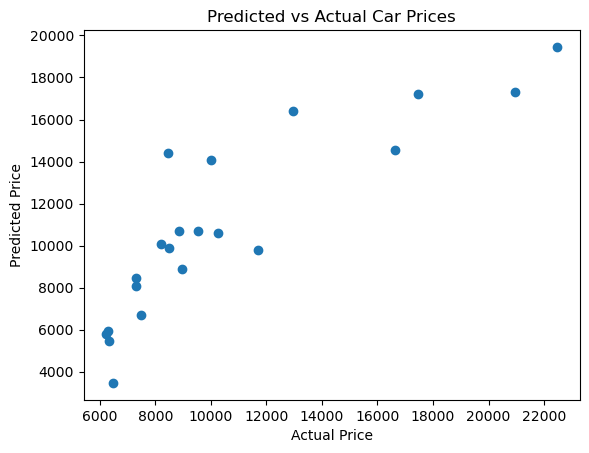

In [20]:
import matplotlib.pyplot as plt

# Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Car Prices")
plt.show()

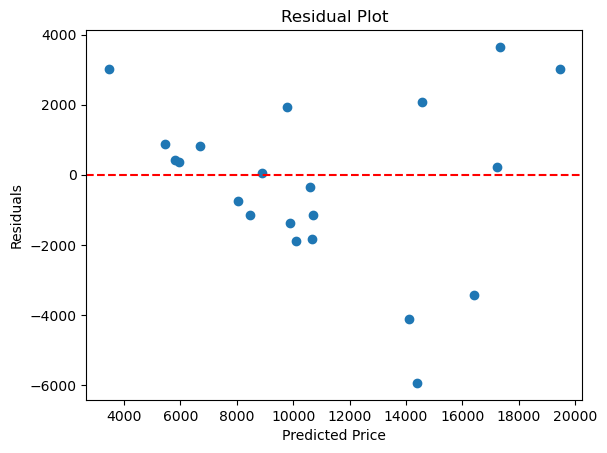

In [21]:
# Residual Plot
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In this project, we successfully built and refined regression models to predict used car prices.  
Key steps included:  
- Data cleaning and preparation  
- Train/Test splitting  
- Baseline Linear Regression  
- Cross-validation for model reliability  
- Polynomial feature expansion with Ridge regression to capture non-linear patterns  
- Hyperparameter tuning using Grid Search  

The final model demonstrated strong predictive performance, as shown by evaluation metrics and visualizations.  

Author - Visura Rodrigo


